In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import utils

from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, learning_curve, GridSearchCV

In [2]:
# read in the data we previously worked on
df_train = pd.read_csv('band_gap_data/df_train.csv')

# recover the formula, feature, and target information
formula = df_train.iloc[:,1:]
X_train = df_train.iloc[:,1:-1]
y_train = df_train.iloc[:,-1]

In [3]:
# we now want to process our data. We are going to use the SVR algorithm.
# This algorithm is based on gradient descent and needs similar feature scales.

# scale each column of data to have a mean of 0 and a variance of 1
scaler = StandardScaler()
# normalizes each row in the data
normalizer = Normalizer()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(normalizer.fit_transform(X_train_scaled), columns=X_train.columns.values)

In [4]:
# We will want to reduce our feature space to make learning easier
pca = PCA(n_components=2)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))

In [5]:
# X_train_ = X_train.iloc[0:100]
X_train_ = X_train_scaled.iloc[0:500]
y_train_ = y_train.iloc[0:500]

def grid_search(X, y, model, parameter_candidates, n_cv=3, title='Grid search results'):
    grid = GridSearchCV(estimator=model,
                        param_grid=parameter_candidates,
                        cv=n_cv,
                        n_jobs=4)
    grid.fit(X, y)
    return grid

model = RandomForestRegressor(max_features='sqrt')
n_estimators_array = np.linspace(10, 50, 10).astype(int)
max_depth_array = np.linspace(1, 25, 10).astype(int)
parameter_candidates = {'n_estimators': n_estimators_array, 'max_depth': max_depth_array}

grid = grid_search(X_train_, y_train_, model, parameter_candidates, n_cv=3, title='Grid search results')

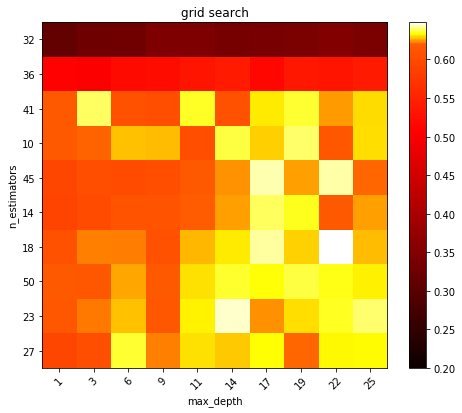

In [6]:
utils.plot_grid_search(grid)

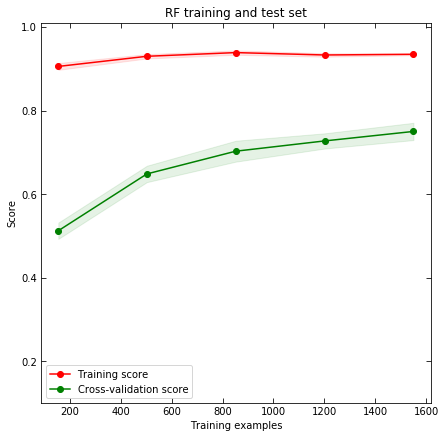

In [7]:
model = RandomForestRegressor()
title = "RF training and test set"
utils.plot_learning_curve(model, title, X_train, y_train, ylim=(0.1, 1.01), cv=5, n_jobs=-1)


In [8]:
model = RandomForestRegressor(**grid.best_params_)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Feature ranking:
1. feature 941 (0.150) : var_atom_mass_divi_therm_cond
2. feature 65 (0.146) : sum_atom_mass_divi_therm_cond
3. feature 280 (0.075) : sum_mol_vol_divi_atom_mass
4. feature 1376 (0.050) : range_atom_mass_divi_mol_vol
5. feature 87 (0.049) : sum_atom_rad_divi_bp
6. feature 938 (0.037) : var_atom_mass_divi_mol_vol


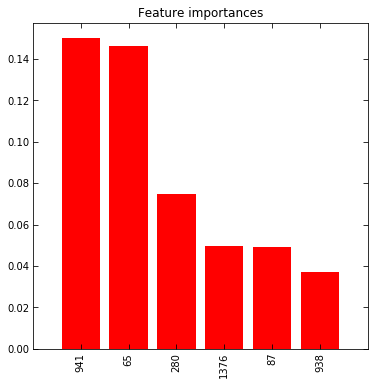

In [9]:
important_feature = utils.rf_feature_importance(model, X_train, N=6)

In [10]:
print(important_feature)

['var_atom_mass_divi_therm_cond' 'sum_atom_mass_divi_therm_cond'
 'sum_mol_vol_divi_atom_mass' 'range_atom_mass_divi_mol_vol'
 'sum_atom_rad_divi_bp' 'var_atom_mass_divi_mol_vol']
